In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
credit_df = pd.read_csv('credit_risk_dataset.csv')

**Feature Name	Description**

person_age:	Age

person_income	Annual: Income

person_home_ownership:	Home ownership

person_emp_length:	Employment length (in years)

loan_intent:	Loan intent

loan_grade:	Loan grade

loan_amnt:	Loan amount

loan_int_rate:	Interest rate

loan_status:	Loan status (0 is non default 1 is default)

loan_percent_income:	Percent income

cb_person_default_on_file:	Historical default

cb_preson_cred_hist_length:	Credit history length

In [ ]:
credit_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
credit_df.shape

(32581, 12)

In [ ]:
credit_df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
credit_df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


## **Considering the large number of null values in 'person_emp_length' and 'loan_int_rate' we will try to use regression imputation to predict values that can be used in place of the NaN entries**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Separate data into two sets: one with missing values and one without
df_missing = credit_df[credit_df['person_emp_length'].isnull()]
df_not_missing = credit_df[~credit_df['person_emp_length'].isnull()]

In [ ]:
# define the features (independent variables) and target (person_emp_length)
# use 'person_income' and 'loan_amnt' as features
features = ['person_income', 'loan_amnt']
target = 'person_emp_length'

In [ ]:
# Create and fit a linear regression model on the data without missing values
regression_model = LinearRegression()
regression_model.fit(df_not_missing[features], df_not_missing[target])

LinearRegression()

In [ ]:
# Predict the missing values
imputed_values = regression_model.predict(df_missing[features])

In [ ]:
# update the DataFrame with the imputed values
credit_df.loc[credit_df['person_emp_length'].isnull(), 'person_emp_length'] = imputed_values

In [ ]:
# doing the same for 'loan_int_rate'
# split into two - one with missing, the other without
df_missing = credit_df[credit_df['loan_int_rate'].isnull()]
df_not_missing = credit_df[~credit_df['loan_int_rate'].isnull()]

In [ ]:
# define the features (independent variables) and target (loan_int_rate)
# using 'person_income' and 'loan_amnt' as features
features = ['person_income', 'loan_amnt']
target = 'loan_int_rate'

In [ ]:
# create and fit a linear regression model on the data without missing values
regression_model = LinearRegression()
regression_model.fit(df_not_missing[features], df_not_missing[target])

LinearRegression()

In [ ]:
# predict the missing values
imputed_values = regression_model.predict(df_missing[features])

In [ ]:
#update the DataFrame with the imputed values
credit_df.loc[credit_df['loan_int_rate'].isnull(), 'loan_int_rate'] = imputed_values

In [ ]:
credit_df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

# **Exploratory Analysis**

In [ ]:
# creating income bins column
# define the income range bins and labels
income_bins = [0, 30000, 60000, 90000, 120000, 150000, float('inf')]
income_labels = ['<30K', '30K-60K', '60K-90K', '90K-120K', '120K-150K', '150K+']

# Create a new column 'income_range' based on 'person_income'
credit_df['income_range'] = pd.cut(credit_df['person_income'], bins=income_bins, labels=income_labels)


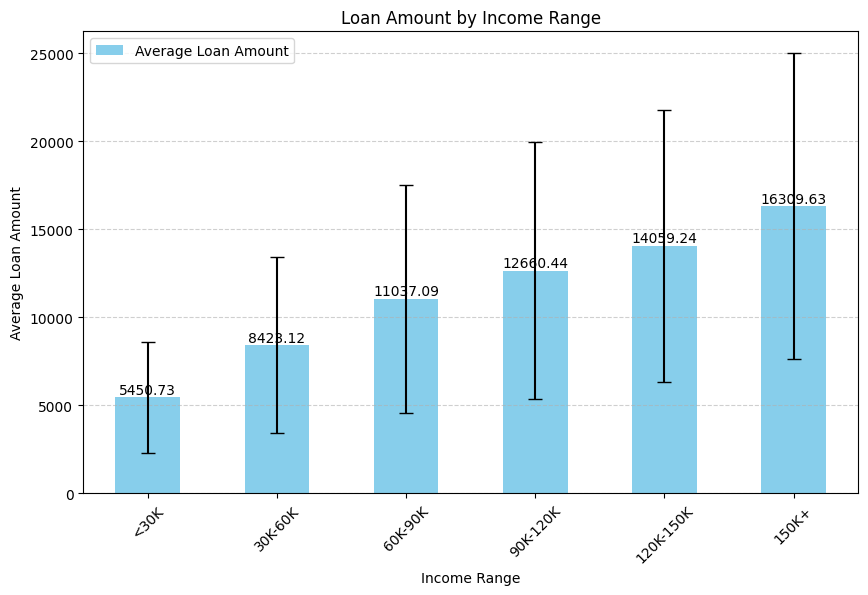

In [ ]:
import matplotlib.pyplot as plt

# group the data by income range and calculate the mean loan amount in each range
income_loan_summary = credit_df.groupby('income_range')['loan_amnt'].mean()
income_loan_std = credit_df.groupby('income_range')['loan_amnt'].std()  # Standard deviation for error bars

# create a bar plot with error bars, data labels, and color coding
plt.figure(figsize=(10, 6))
ax = income_loan_summary.plot(kind='bar', color='skyblue', yerr=income_loan_std, capsize=5)
plt.title('Loan Amount by Income Range')
plt.xlabel('Income Range')
plt.ylabel('Average Loan Amount')
plt.xticks(rotation=45)

# adding data labels
for i, v in enumerate(income_loan_summary):
    ax.text(i, v + 200, f'{v:.2f}', color='black', ha='center')

# legends, gridlines and color customization
plt.legend(['Average Loan Amount'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [ ]:
# conducting feature importance with a random forest classifier
X = credit_df[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']]
y = credit_df['loan_status']


In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()


In [ ]:
classifier.fit(X, y)


RandomForestClassifier()

In [ ]:
feature_importance = classifier.feature_importances_


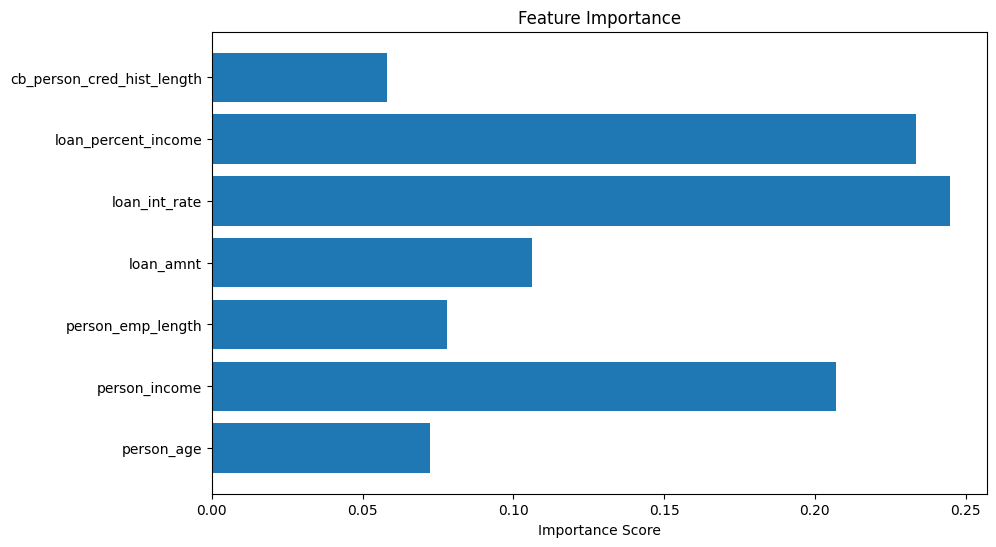

In [ ]:
#plotting feature importance

# Create a bar plot of feature importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# using logistic regression to predict probable values for new "probability of default" column
# including 'cb_person_default_on_file' as a feature for this regression model
# one-hot encoding to convert 'cb_person_default_on_file' into numeric format
X = pd.get_dummies(credit_df[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'cb_person_default_on_file', 'loan_grade']], columns=['cb_person_default_on_file', 'loan_grade'], drop_first=True)

logistic_model = LogisticRegression()
logistic_model.fit(X, y)

# predicting pd
pd_values = logistic_model.predict_proba(X)[:, 1]  # Probability of Default

# adding pd values to existing dataframe
credit_df['pd'] = pd_values


In [ ]:
credit_df['loan_grade'].head(10)

0    D
1    B
2    C
3    C
4    C
5    A
6    B
7    B
8    A
9    D
Name: loan_grade, dtype: object

In [ ]:
credit_df['ead'] = credit_df['loan_amnt'] - credit_df['loan_amnt'] * credit_df['loan_percent_income']
# to calculate exposure at default

In [ ]:
list(credit_df)

['person_age',
 'person_income',
 'person_home_ownership',
 'person_emp_length',
 'loan_intent',
 'loan_grade',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_default_on_file',
 'cb_person_cred_hist_length',
 'income_range',
 'pd',
 'ead']

In [ ]:
# adding a column for loss given default using recovery rate
# calculating recovery rate
credit_df['recovery_rate'] = (credit_df['ead'] - (credit_df['pd'] * credit_df['ead'])) / credit_df['ead']

# calculating loss given default as a percentage
credit_df['lgd'] = (1 - credit_df['recovery_rate']) * 100

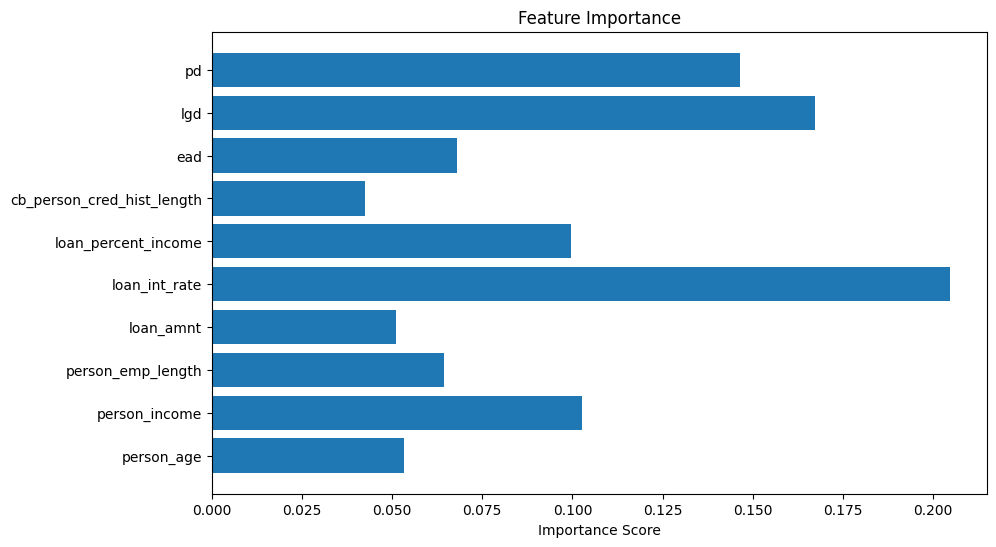

In [ ]:
# running feature importance again with new columns

X = credit_df[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'ead', 'lgd', 'pd']]
y = credit_df['loan_status']
classifier = RandomForestClassifier()
classifier.fit(X, y)
feature_importance = classifier.feature_importances_
#plot
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.show()


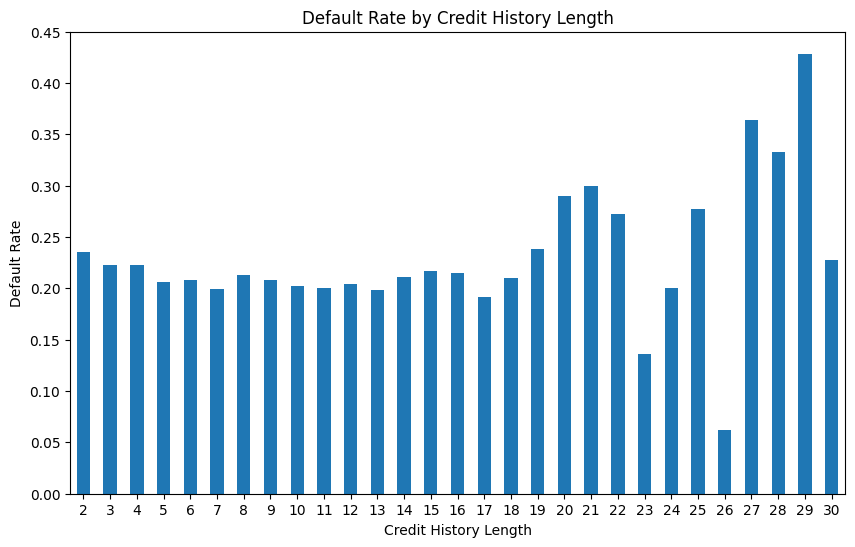

In [ ]:
# group data by 'cb_person_cred_hist_length' and calculate the default rate
default_rate_by_length = credit_df.groupby('cb_person_cred_hist_length')['loan_status'].mean()

# bar plot
plt.figure(figsize=(10, 6))
default_rate_by_length.plot(kind='bar')
plt.title('Default Rate by Credit History Length')
plt.xlabel('Credit History Length')
plt.ylabel('Default Rate')
plt.xticks(rotation=0)
plt.show()


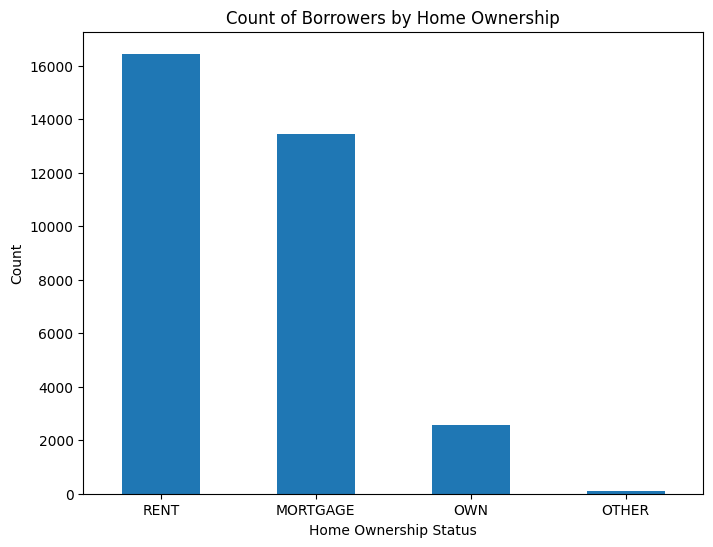

In [ ]:
ownership_counts = credit_df['person_home_ownership'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
ownership_counts.plot(kind='bar')
plt.title('Count of Borrowers by Home Ownership')
plt.xlabel('Home Ownership Status')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

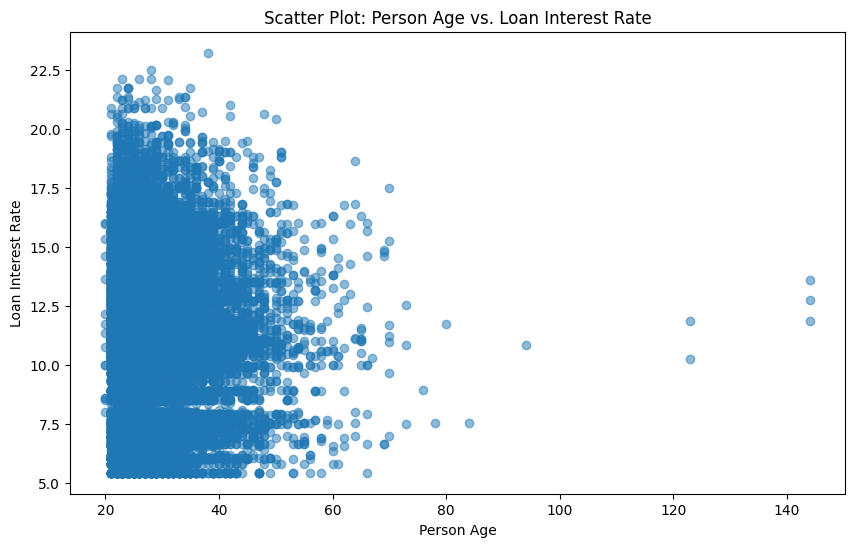

In [ ]:
# Create a scatter plot for 'person_age' vs. 'loan_int_rate'
plt.figure(figsize=(10, 6))
plt.scatter(credit_df['person_age'], credit_df['loan_int_rate'], alpha=0.5)
plt.title('Scatter Plot: Person Age vs. Loan Interest Rate')
plt.xlabel('Person Age')
plt.ylabel('Loan Interest Rate')
plt.show()

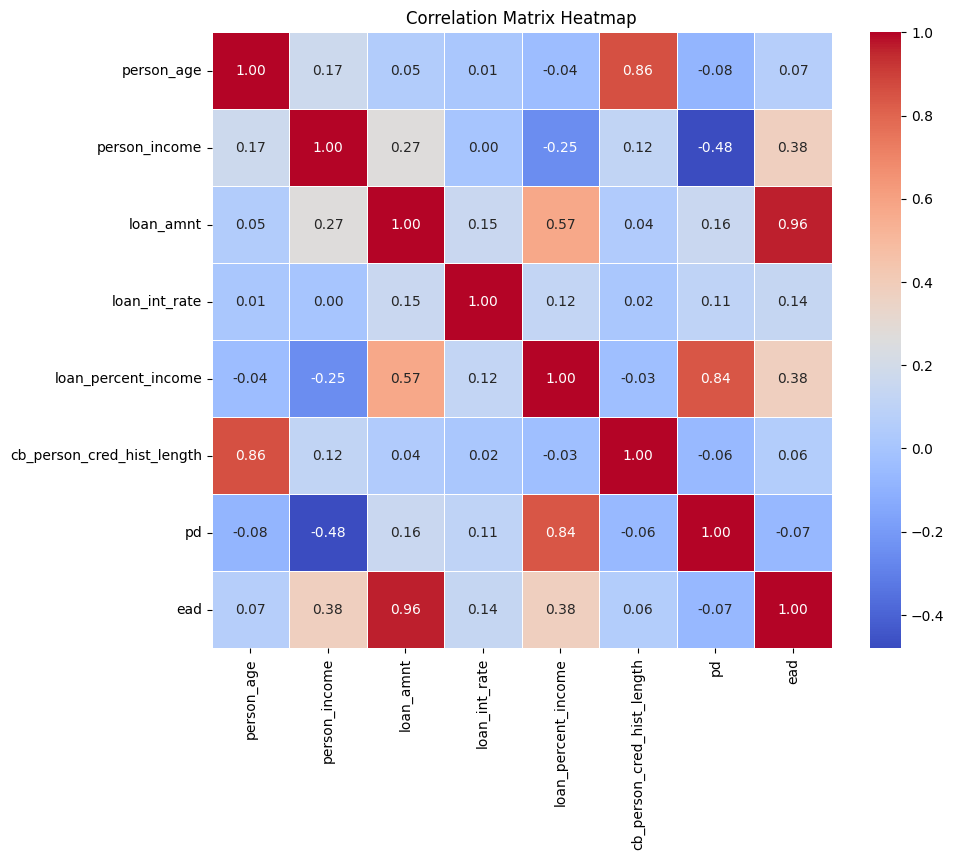

In [ ]:
# correlation matrix columns
numeric_columns = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'pd', 'ead']
correlation_matrix = credit_df[numeric_columns].corr()
#heatmap to visualize
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
list(credit_df) #use a standard feedforward neural networek

['person_age',
 'person_income',
 'person_home_ownership',
 'person_emp_length',
 'loan_intent',
 'loan_grade',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_default_on_file',
 'cb_person_cred_hist_length',
 'income_range',
 'pd',
 'ead',
 'recovery_rate',
 'lgd']

In [ ]:
credit_df.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,income_range,pd,ead,recovery_rate,lgd
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,30K-60K,0.791633,14350.0,0.208367,79.163311
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,<30K,0.429506,900.0,0.570494,42.950594
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,<30K,0.548939,2365.0,0.451061,54.893923
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,60K-90K,0.744661,16450.0,0.255339,74.466130
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,30K-60K,0.820827,15750.0,0.179173,82.082658
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,<30K,0.466055,1875.0,0.533945,46.605502
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3,60K-90K,0.645285,19250.0,0.354715,64.528457
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4,60K-90K,0.627817,19600.0,0.372183,62.781666
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2,60K-90K,0.588635,20300.0,0.411365,58.863501
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3,<30K,0.441246,1344.0,0.558754,44.124576


In [ ]:
credit_df.shape

(32581, 17)

**Below we use a Feed Forward Neural Network to make predictions on the loan status. By doing so, we are predicting, based on numerous factors whether or not someone will default on their loans. We use the results of the feature importance model we created earlier and use the hyperparameters with a importance score above 1**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
X = credit_df[['loan_int_rate', 'lgd', 'pd', 'person_income', 'loan_percent_income']]

# target variable 'Y' is 'loan_status' (0 for no default, 1 for default)
Y = credit_df['loan_status']

In [ ]:
#data split into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# standard scaler as opposed to minmax as standard scaler is common when working with neural networks
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# building ffnn for binary classification
model = keras.Sequential()
model.add(layers.Input(shape=(X_train.shape[1],)))  # input layer
model.add(layers.Dense(128, activation='relu'))  # hidden layer
model.add(layers.Dropout(0.3))  # dropout layer to target potential overfitting
model.add(layers.Dense(64, activation='relu'))  # second hidden layer
model.add(layers.Dense(1, activation='sigmoid'))  # output layer for binary classification

In [ ]:
# compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# train
model.fit(X_train, Y_train, epochs=50, batch_size=64, validation_split=0.2)


Epoch 1/50
326/326 [==============================] - 2s 5ms/step - loss: 0.4074 - accuracy: 0.8231 - val_loss: 0.3917 - val_accuracy: 0.8320
Epoch 2/50
326/326 [==============================] - 1s 4ms/step - loss: 0.3757 - accuracy: 0.8388 - val_loss: 0.3883 - val_accuracy: 0.8364
Epoch 3/50
326/326 [==============================] - 1s 4ms/step - loss: 0.3702 - accuracy: 0.8420 - val_loss: 0.3843 - val_accuracy: 0.8391
Epoch 4/50
326/326 [==============================] - 1s 4ms/step - loss: 0.3673 - accuracy: 0.8428 - val_loss: 0.3835 - val_accuracy: 0.8410
Epoch 5/50
326/326 [==============================] - 2s 6ms/step - loss: 0.3643 - accuracy: 0.8452 - val_loss: 0.3823 - val_accuracy: 0.8385
Epoch 6/50
326/326 [==============================] - 2s 5ms/step - loss: 0.3625 - accuracy: 0.8442 - val_loss: 0.3795 - val_accuracy: 0.8392
Epoch 7/50
326/326 [==============================] - 1s 4ms/step - loss: 0.3604 - accuracy: 0.8471 - val_loss: 0.3777 - val_accuracy: 0.8400
Epoch 

In [ ]:
# evaluate
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

204/204 [==============================] - 0s 2ms/step - loss: 0.3493 - accuracy: 0.8559
Test Loss: 0.3493, Test Accuracy: 0.8559


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [ ]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred>0.5).astype(int) # converting probabilities into binary (0 or 1)

204/204 [==============================] - 1s 3ms/step


In [ ]:
# accuracy
accuracy = accuracy_score(Y_test, y_pred_binary)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8559


**Accuracy of 85.59% indicates that 85.59% of predictions were made correctly by the model**

In [ ]:
# precision
precision = recall_score(Y_test, y_pred_binary)
print(f"Precision: {precision:.4f}")

Precision: 0.5606


**Precision of 0.5606 means that out of all instances predicted as defaults (which is considered the positive class in this case) around 56.06% of those are true defaults, the rest are false positives**

In [ ]:
# recall
recall = recall_score(Y_test, y_pred_binary)
print(f"Recall: {recall:.4f}")

Recall: 0.5606


**Recall of 0.5606 means that the model has captured 56.06% of all TRUE defaults and the rest are false negatives**

In [ ]:
# f1 score
f1 = f1_score(Y_test, y_pred_binary)
print(f"F1-score: {f1:.4f}")

F1-score: 0.6331


**F-1 Score is a harmonic mean between precision and recall and provides a balance between the two metrics. An F-1 score of 0.6331 means that the model achieves a reasonable trade-off between precision and recall**

In [ ]:
# ROC AUC
roc_auc = roc_auc_score(Y_test, y_pred)
print(f"ROC AUC: {roc_auc:.4f}")

ROC AUC: 0.8688


**ROC AUC or Reciever Operating Characteristic Area Under the Curve measures the model's ability to discriminate between positive and negative cases in terms of probability. An ROC AUC of 0.8688 means that there is a good discriminatory power in the model**

In [ ]:
conf_matrix = confusion_matrix(Y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[4768  304]
 [ 635  810]]


**Given this information let us use the existing information like Probability of Default, Exposure at Default and Loss Given Default to create a column that displays the Expected Loss. We can take a subset of the data of all those who have defaulted on their loans and predict the expected loss from their default**

In [ ]:
# taking subset of credit_df where credit_df['loan_status'] == 1
subset_default = credit_df[credit_df['loan_status'] == 1]

In [ ]:
subset_default.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,income_range,pd,ead,recovery_rate,lgd
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,30K-60K,0.791633,14350.0,0.208367,79.163311
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,<30K,0.548939,2365.0,0.451061,54.893923
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,60K-90K,0.744661,16450.0,0.255339,74.466130
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,30K-60K,0.820827,15750.0,0.179173,82.082658
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,<30K,0.466055,1875.0,0.533945,46.605502
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3,60K-90K,0.645285,19250.0,0.354715,64.528457
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4,60K-90K,0.627817,19600.0,0.372183,62.781666
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2,60K-90K,0.588635,20300.0,0.411365,58.863501
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3,<30K,0.441246,1344.0,0.558754,44.124576
10,22,85000,RENT,6.0,VENTURE,B,35000,10.37,1,0.41,N,4,60K-90K,0.568799,20650.0,0.431201,56.879901


In [ ]:
subset_default.shape

(7108, 17)

In [ ]:
# create a copy of the subset to prevent the SettingWithCopyWarning
subset_default = credit_df[credit_df['loan_status'] == 1].copy()

# perform the calculation on the copied DataFrame
subset_default['expected_loss'] = subset_default['pd'] * subset_default['ead'] * subset_default['lgd']


In [ ]:
subset_default.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,income_range,pd,ead,recovery_rate,lgd,expected_loss
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,30K-60K,0.791633,14350.0,0.208367,79.163311,8.992901e+05
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,<30K,0.548939,2365.0,0.451061,54.893923,7.126556e+04
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,60K-90K,0.744661,16450.0,0.255339,74.466130,9.121861e+05
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,30K-60K,0.820827,15750.0,0.179173,82.082658,1.061166e+06
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,<30K,0.466055,1875.0,0.533945,46.605502,4.072637e+04
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3,60K-90K,0.645285,19250.0,0.354715,64.528457,8.015549e+05
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4,60K-90K,0.627817,19600.0,0.372183,62.781666,7.725414e+05
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2,60K-90K,0.588635,20300.0,0.411365,58.863501,7.033771e+05
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3,<30K,0.441246,1344.0,0.558754,44.124576,2.616739e+04
10,22,85000,RENT,6.0,VENTURE,B,35000,10.37,1,0.41,N,4,60K-90K,0.568799,20650.0,0.431201,56.879901,6.680942e+05


In [ ]:
subset_default.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7108 entries, 0 to 32578
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   person_age                  7108 non-null   int64   
 1   person_income               7108 non-null   int64   
 2   person_home_ownership       7108 non-null   object  
 3   person_emp_length           7108 non-null   float64 
 4   loan_intent                 7108 non-null   object  
 5   loan_grade                  7108 non-null   object  
 6   loan_amnt                   7108 non-null   int64   
 7   loan_int_rate               7108 non-null   float64 
 8   loan_status                 7108 non-null   int64   
 9   loan_percent_income         7108 non-null   float64 
 10  cb_person_default_on_file   7108 non-null   object  
 11  cb_person_cred_hist_length  7108 non-null   int64   
 12  income_range                7108 non-null   category
 13  pd               

**We will be using an XGBoost model to predict the expected loss for all defaulted loans**

In [ ]:
import xgboost as xgb

In [ ]:
# dmatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test, label=Y_test)

In [ ]:
# setting hyperparameters (subject to change)
params = {
    'objective': 'reg:squarederror',  # Regression objective
    'eval_metric': 'rmse',  # Root Mean Squared Error as the evaluation metric
    'max_depth': 5,  # Adjust as needed
    'n_estimators': 100,  # Number of boosting rounds
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
}


In [ ]:
# train
model = xgb.train(params, dtrain)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [21:07:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
from sklearn.metrics import mean_squared_error

# predictions
y_pred = model.predict(dtest)

# root mean squared error calculations
rmse = mean_squared_error(Y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse:.4f}")


Root Mean Squared Error: 0.3393
